# PyCPT Version 2 prototype for station data

#### Imports - This cell imports PyCPTv2 libraries 

In [1]:
import pycpt
import cptdl as dl 
from cptextras import get_colors_bars
import datetime as dt
import numpy as np
from pathlib import Path
import xarray as xr

#### Define case directory
The directory where inputs, outputs, and figures generated by this notebook will be stored.

In [2]:
case_dir = Path.home() / "Desktop/PyCPT" / "Chile_station_example"

#### Parameters - This cell defines the parameters of your CPT analysis

In [3]:
dl.observations.update({
    #Station data 1981-2017: 467 stations reported precipitation, and 163 stations reported
    'CHILESTATIONS_2017.PRCP': "http://iridl.ldeo.columbia.edu/home/.xchourio/.ACToday/.CHL/.prcp/T/{int(lead_high-lead_low)+1}/seasonalAverage/T/%28{targetcenter(target)}%29/VALUES/{int(lead_high-lead_low)+1}/mul/-999/setmissing_value/{'%5B%5D%5BT%5D' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2017.TMAX': "http://iridl.ldeo.columbia.edu/home/.xchourio/.ACToday/.CHL/.tempX/T/{int(lead_high-lead_low)+1}/seasonalAverage/T/%28{targetcenter(target)}%29/VALUES/-999/setmissing_value/{'%5B%5D%5BT%5D' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2017.TMIN': "http://iridl.ldeo.columbia.edu/home/.xchourio/.ACToday/.CHL/.tempN/T/{int(lead_high-lead_low)+1}/seasonalAverage/T/%28{targetcenter(target)}%29/VALUES/-999/setmissing_value/{'%5B%5D%5BT%5D' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    #Station data 1981-2023: 212 stations reported precipitation, and 180 stations reported
    'CHILESTATIONS_2020.PRCP': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_prec/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.prcp/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//prcp/def/%3Aa/%7BY/elev/X/Name/prcp%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMAX': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmax/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//tmax/def/%3Aa/%7BY/elev/X/Name/tmax%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMIN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmin/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//tmin/def/%3Aa/%7BY/elev/X/Name/tmin%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMEAN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmean/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//tmean/def/%3Aa/%7BY/elev/X/Name/tmean%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    #Grid data 0.05 1960-2021
    'CR2MET0p05.PRCP': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.prcp/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMAX': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmax/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMIN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmin/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMEAN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmean/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    #Grid data 0.25 1960-2021
    'CR2MET0p25.PRCP': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.prcp/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMAX': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmax/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMIN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmin/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMEAN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmean/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}"
})

In [4]:
MOS = 'CCA' # must be one of 'CCA', 'PCR'

# Use dl.observations.keys() to see all options for predictand 
# and dl.hindcasts.keys() to see all options for predictors.
# Make sure your first_year & final_year are compatible with 
# your selections for your predictors and predictands.
predictor_names = [ "CanSIPSIC3.PRCP", 'SEAS51.PRCP']
predictor_names = ["GEOSS2S.TMIN"]


# To download predictand observations from the Data Library, set
#
#   local_predictand_file = None
#
# To read predictand data from a local file instead,
# set local_predictand_file to the full pathname of the file. e.g.
#
#   local_predictand_file = "/home/aaron/src/pycpt_notebooks/obs_PRCP_Oct-Dec.tsv"
#
# The file should be formatted according to the following guidelines:
# https://cpthelp.iri.columbia.edu/CPT_use_input_gridded.html
# https://cpthelp.iri.columbia.edu/CPT_use_input_stations.html

# TODO applying the predictand extent constraints causes a segfault in ingrid.
predictand_name = 'CHILESTATIONS_2020.TMIN'
#predictand_name = 'CR2MET0p05.PRCP'
use_dlauth = True
local_predictand_file = None

    
download_args = { 
    # 'fdate':
    #   The initialization date of the model forecasts / hindcasts.
    #   This field is defined by a python datetime.datetime object,
    #   for example: dt.datetime(2022, 5, 1) # YYYY, MM, DD as integers
    #   The year field is only used for forecasts, otherwise ignored.
    #   The day field is only used in subseasonal forecasts, otherwise ignored.
    #   The month field is an integer representing a month - ie, May=5.
    'fdate':  dt.datetime(2023, 5, 1),

    # 'first_year':
    #   The first year of hindcasts you want. **NOT ALL MODELS HAVE ALL YEARS**.
    #   Double check that your model has hindcast data for all years in [first_year, final_year].
    #   This field is defined by a python integer representing a year, e.g. 1993.
    'first_year': 1981,  

    # 'final_year':
    #   The final year of hindcasts you want. **NOT ALL MODELS HAVE ALL YEARS**.
    #   Double check that your model has hindcast data for all years in [first_year, final_year].
    #   This field is defined by a python integer representing a year, e.g. 2016.
    'final_year': 2021,  

    # 'target': 
    #   Mmm-Mmm indicating the months included in the target period of the forecast. 
    #   This field is defined by a python string, with two three-letter month name abbreviations 
    #   whose first letters are capitalized, and all other letters are lowercase
    #   and who are separated by a dash character. 
    #   For example, if you wanted a JJA target period, you would use 'Jun-Aug'.
    'target': 'Jun',

    # 'predictor_extent':
    #   The geographic bounding box of the climate model data you want to download.
    #   This field is defined by a python dictionary with the keys "north", "south",
    #   "east", and "west", each of which maps to a python integer representing the 
    #   edge of a bounding box. i.e., "north" will be the northernmost boundary,
    #   "south" the southernmost boundary.
    #   Example: {"north": 90, "south": -90, "east": 0, "west": 180}
    'predictor_extent': {
        'west': -80, 
        'east':  -62,
        'south': -60, 
        'north': -12,
      },

    # 'predictand_extent':
    #   The geographic bounding box of the observation data you want to download.
    #   This field is defined by a python dictionary with the keys "north", "south",
    #   "east", and "west", each of which maps to a python integer representing the 
    #   edge of a bounding box. i.e., "north" will be the northernmost boundary,
    #   "south" the southernmost boundary.
    #   Example: {"north": 90, "south": -90, "east": 0, "west": 180}
    'predictand_extent': {
        'west':  -73.75,
        'east': -69.75,
        'south': -40,
        'north': -32,
      },

    'use_dlauth': True,

    # 'filetype':
    #   The filetype to be downloaded. for now, it saves a lot of headache just to set this equal
    #   to 'cptv10.tsv' which is a boutique plain-text CPT filetype based on .tsv + metadata.
    'filetype': 'cptv10.tsv'
}

cpt_args = { 
    'transform_predictand': None,  # transformation to apply to the predictand dataset - None, 'Empirical', 'Gamma'
    'tailoring': 'Anomaly',  # tailoring None, 'Anomaly'
    'cca_modes': (1,3), # minimum and maximum of allowed CCA modes 
    'x_eof_modes': (1,8), # minimum and maximum of allowed X Principal Componenets 
    'y_eof_modes': (1,6), # minimum and maximum of allowed Y Principal Components 
    'validation': 'crossvalidation', # the type of validation to use; only 'crossvalidation' is supported for now
    'drymask': False, #whether or not to use a drymask of -999
    'scree': True, # whether or not to save % explained variance for eof modes
    'crossvalidation_window': 1,  # number of samples to leave out in each cross-validation step 
    'synchronous_predictors': True, # whether or not we are using 'synchronous predictors'
}

Set `force_download = False` to avoid re-downloading files you have already downloaded. Note: if you have changed anything in `download_args` since the data were last downloaded, you must set `force_download = True`, otherwise you will use the old data instead of the new.

In [5]:
force_download = True

In [6]:
domain_dir = pycpt.setup(case_dir, download_args["predictor_extent"])

Input data will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/data
Figures will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/figures
Output will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/output
Input data will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/data
Figures will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/figures
Output will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/output


#### Visualize predictor and predictand domains

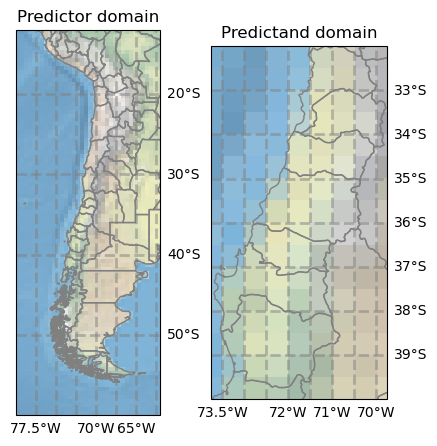

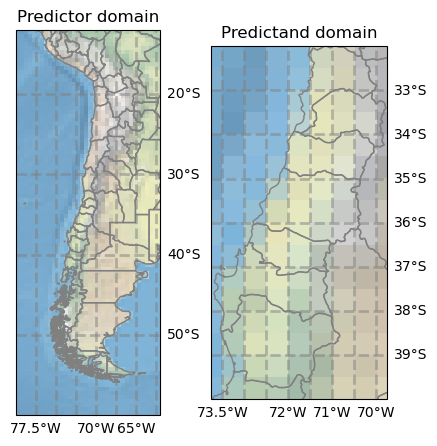

In [7]:
pycpt.plot_domains(download_args['predictor_extent'], download_args['predictand_extent'])

#### Download Observations, Hindcasts, and Forecasts from IRI Data Library

In [8]:
Y, hindcast_data, forecast_data = pycpt.download_data(predictand_name, local_predictand_file, predictor_names, download_args, domain_dir, force_download)

URL: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NASA-GEOSS2S/.FORECAST/.MONTHLY/.t2mmin/%5BM%5D/average/Z/2/VALUES/S/%280000%201%20May%202023%29/VALUES/L/1.5/1.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/-60/-12/RANGEEDGES/X/-80/-62/RANGEEDGES/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv

URL: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NASA-GEOSS2S/.FORECAST/.MONTHLY/.t2mmin/%5BM%5D/average/Z/2/VALUES/S/%280000%201%20May%202023%29/VALUES/L/1.5/1.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/-60/-12/RANGEEDGES/X/-80/-62/RANGEEDGES/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv

DOWNLOADING: [*************************] (14 KB) 0:00:00.168911
DOWNLOADING: [*************************] (14 KB) 0:00:00.168911
URL: https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmin/T/%28Jun%201981-2021%29/seasonalAverage/-

#### Perform CPT Analysis
Set `interactive = True` to see detailed output from CPT.

In [9]:
interactive = False

In [10]:
hcsts, fcsts, skill, pxs, pys = pycpt.evaluate_models(hindcast_data, MOS, Y, forecast_data, cpt_args, domain_dir, predictor_names, interactive)

#### Plot skill of individual models

Deterministic skill metrics:
- pearson
- spearman
- two_alternative_forced_choice
- roc_area_below_normal (Area under ROC curve for Below Normal category)
- roc_area_above_normal (Area under ROC curve for Above Normal category)

Probabilistic skill metrics (in sample):
- generalized_roc
- rank_probability_skill_score

In [11]:
skill_metrics = [
    "pearson",
    "spearman",
    "two_alternative_forced_choice",
    "roc_area_below_normal",
    "roc_area_above_normal",
]

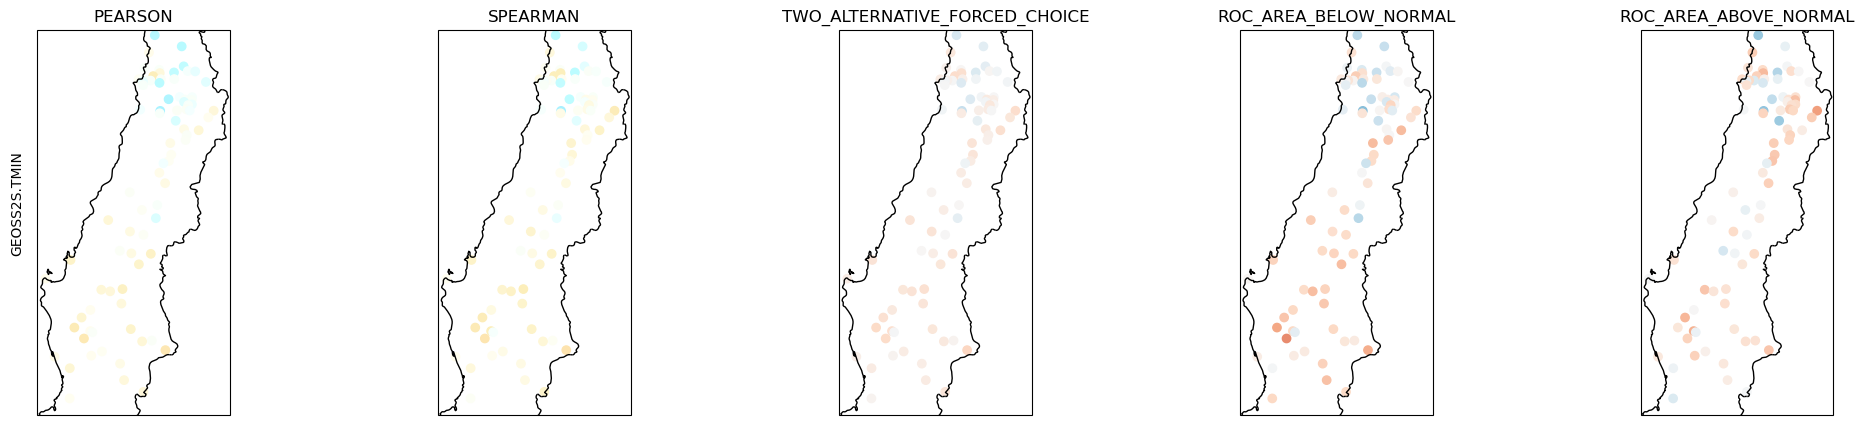

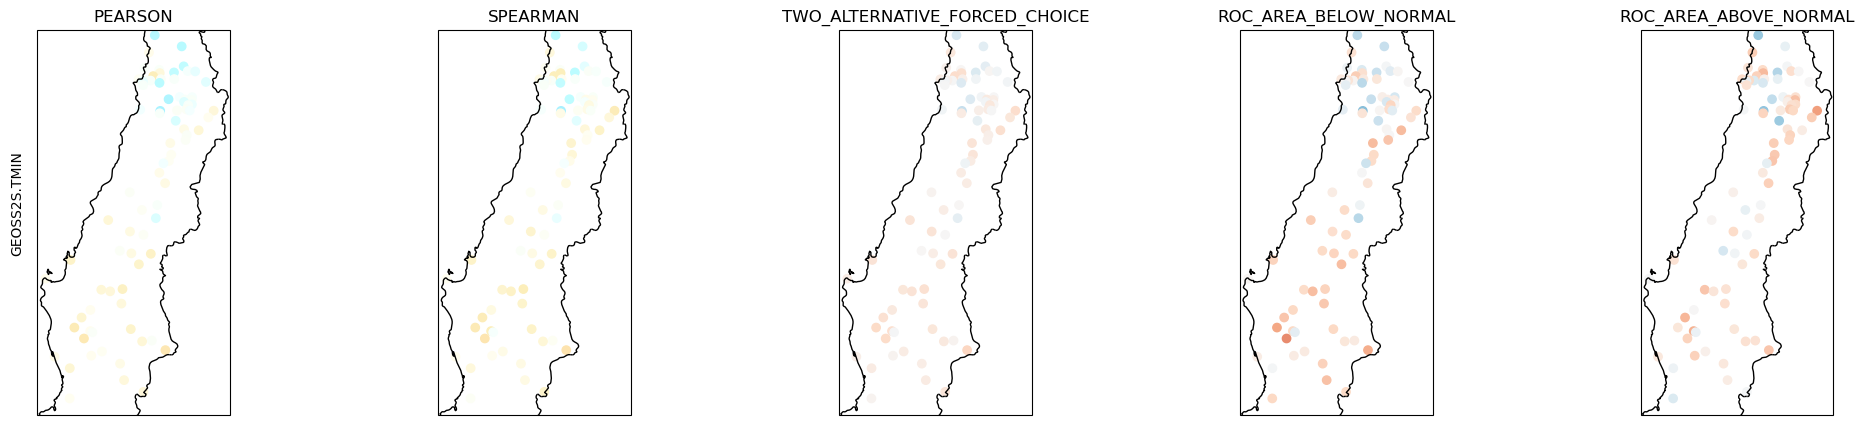

In [12]:
pycpt.plot_skill(predictor_names, skill, MOS, domain_dir, skill_metrics, domain=download_args['predictand_extent'])

#### Plot EOF Modes

In [13]:
#If you wish to use a color bar different from the default one, adjust the value below; Otherwise, use 'None'.
color_bar = None

GEOSS2S.TMIN: EOF 1
GEOSS2S.TMIN: EOF 1


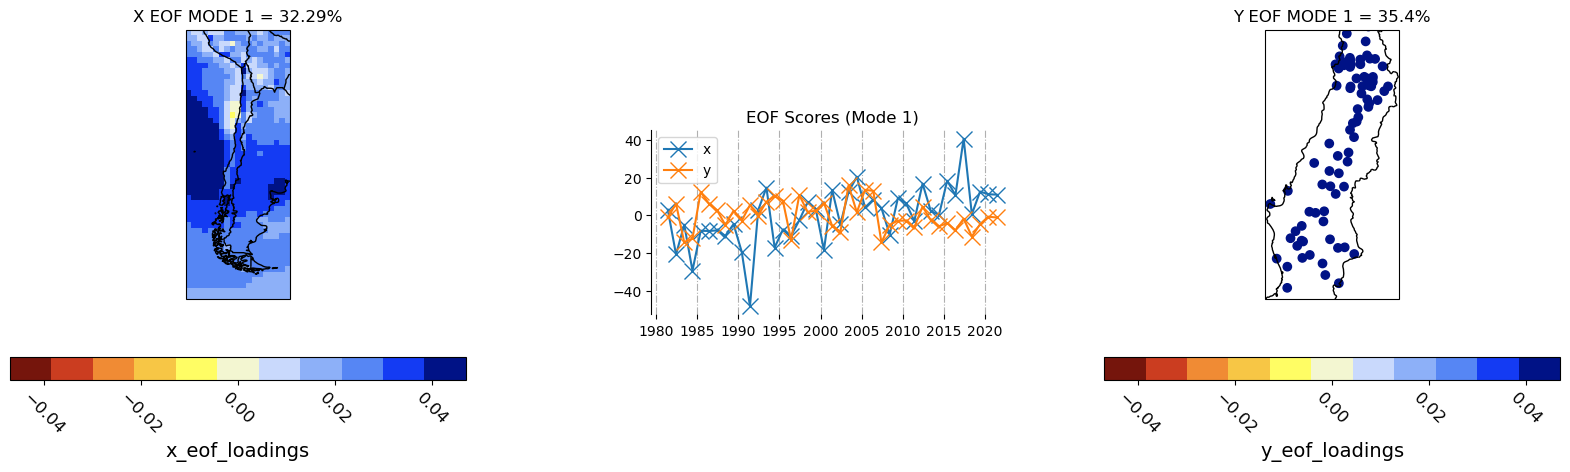

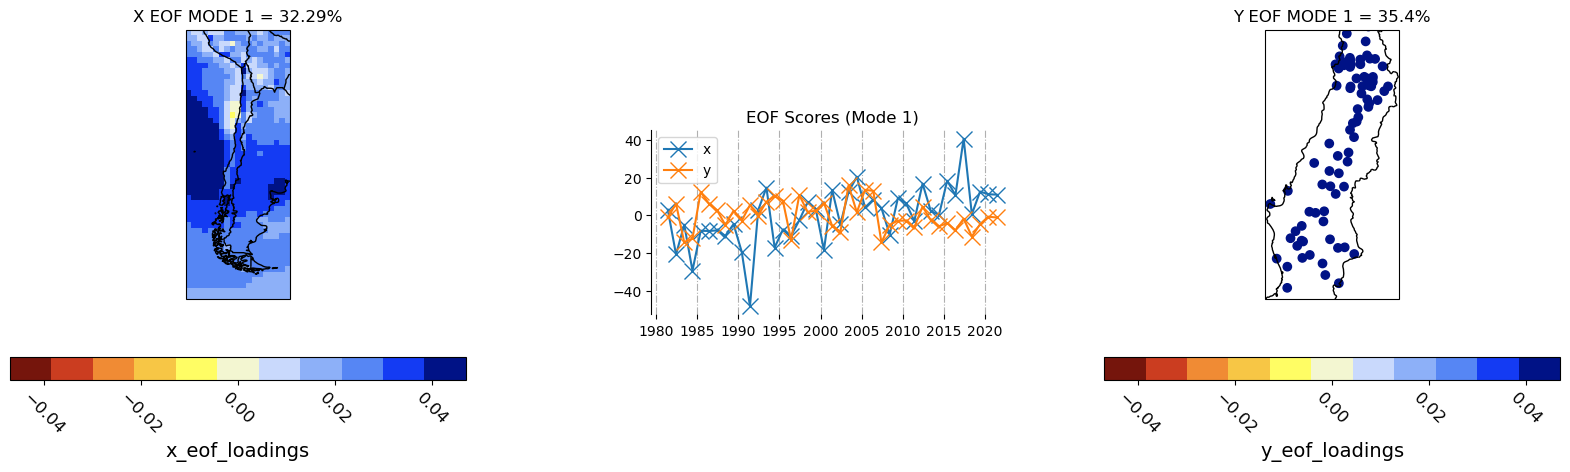

GEOSS2S.TMIN: EOF 2
GEOSS2S.TMIN: EOF 2


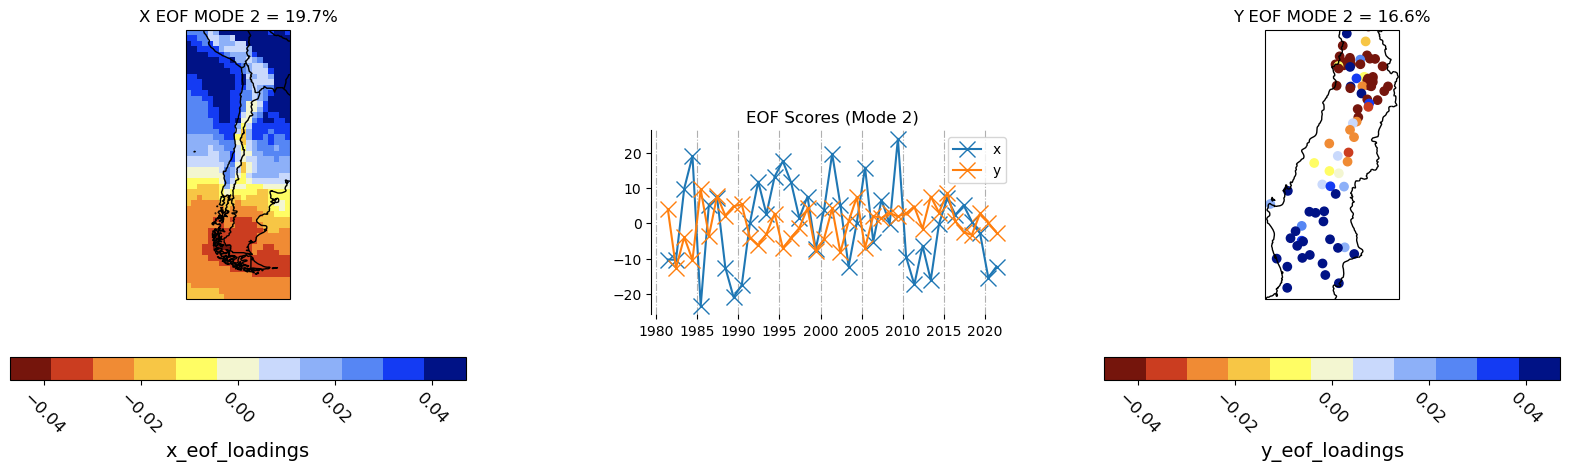

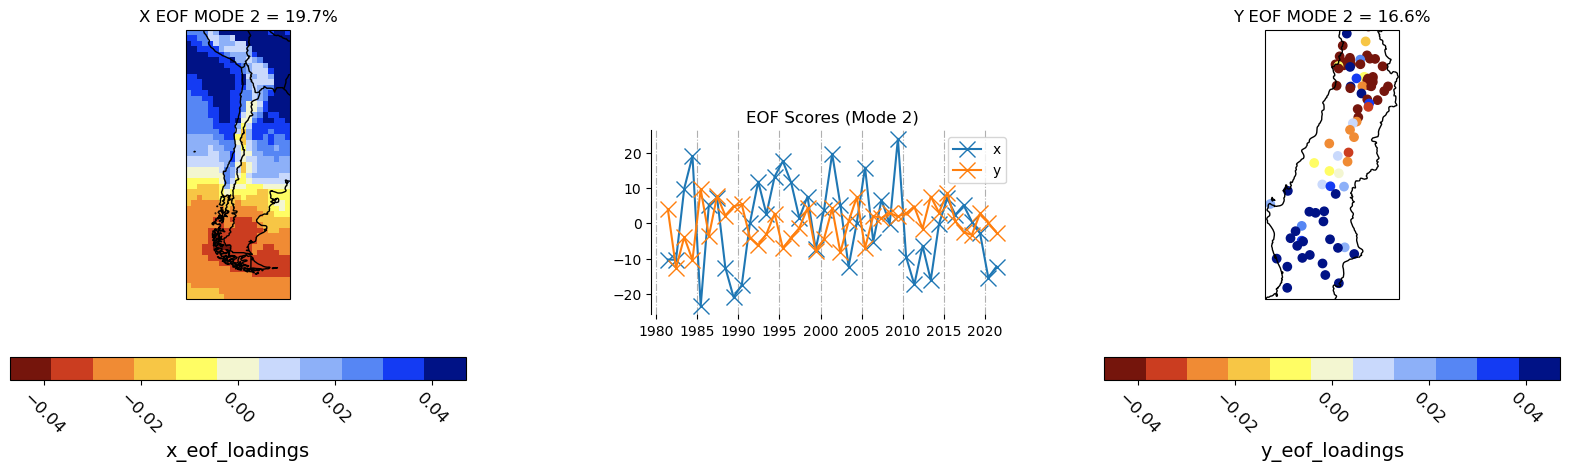

GEOSS2S.TMIN: EOF 3
GEOSS2S.TMIN: EOF 3


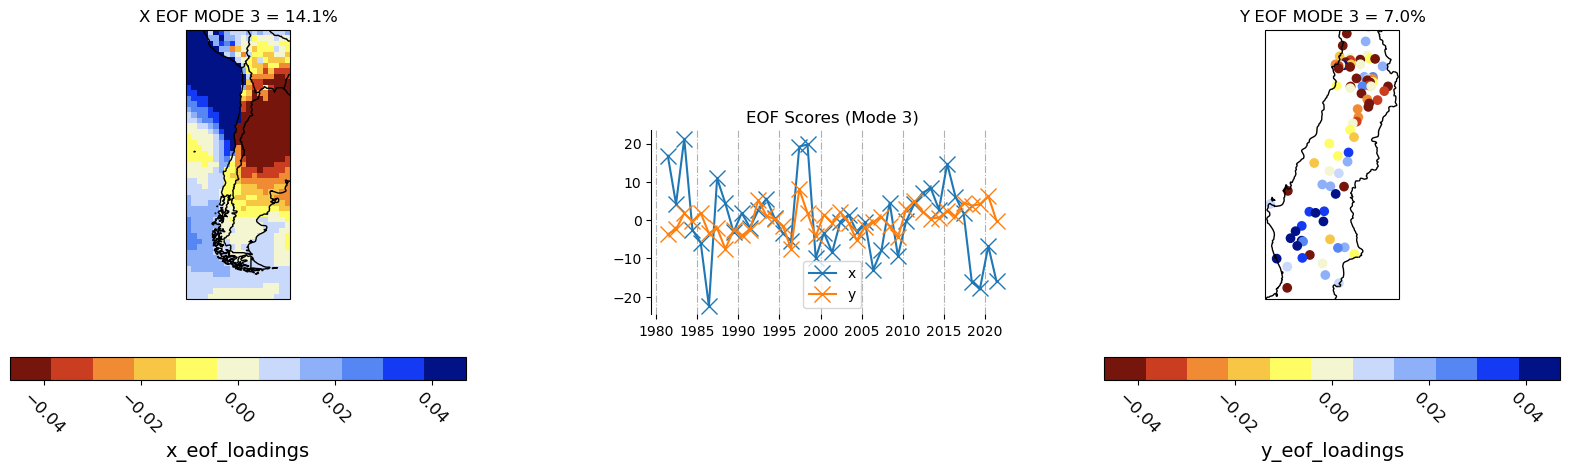

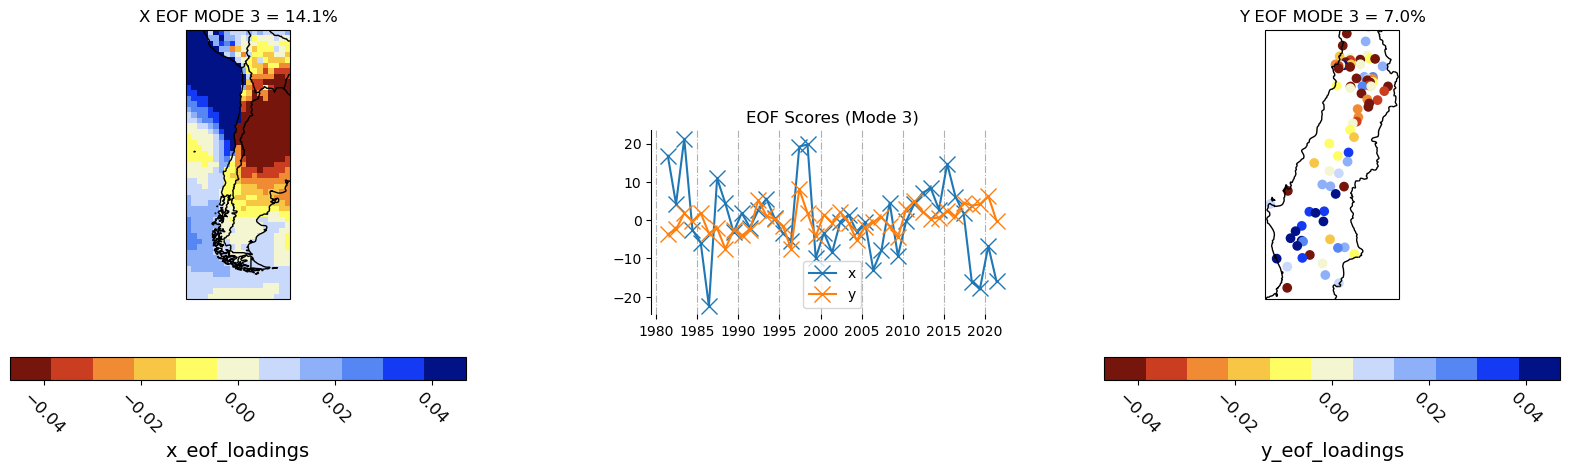

GEOSS2S.TMIN: EOF 4
GEOSS2S.TMIN: EOF 4


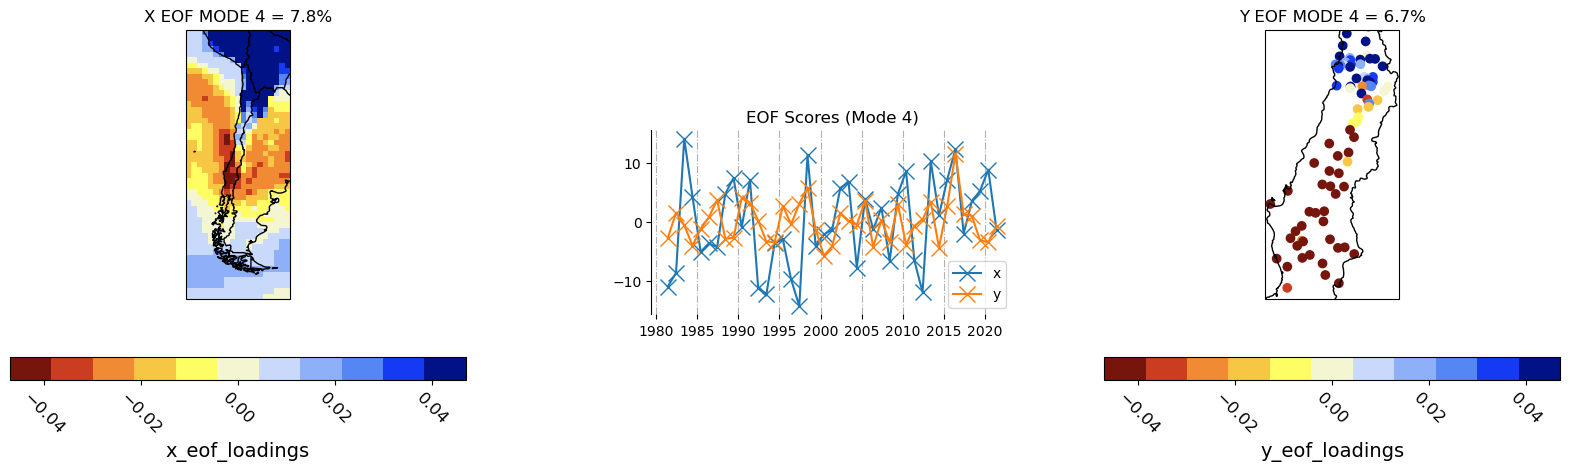

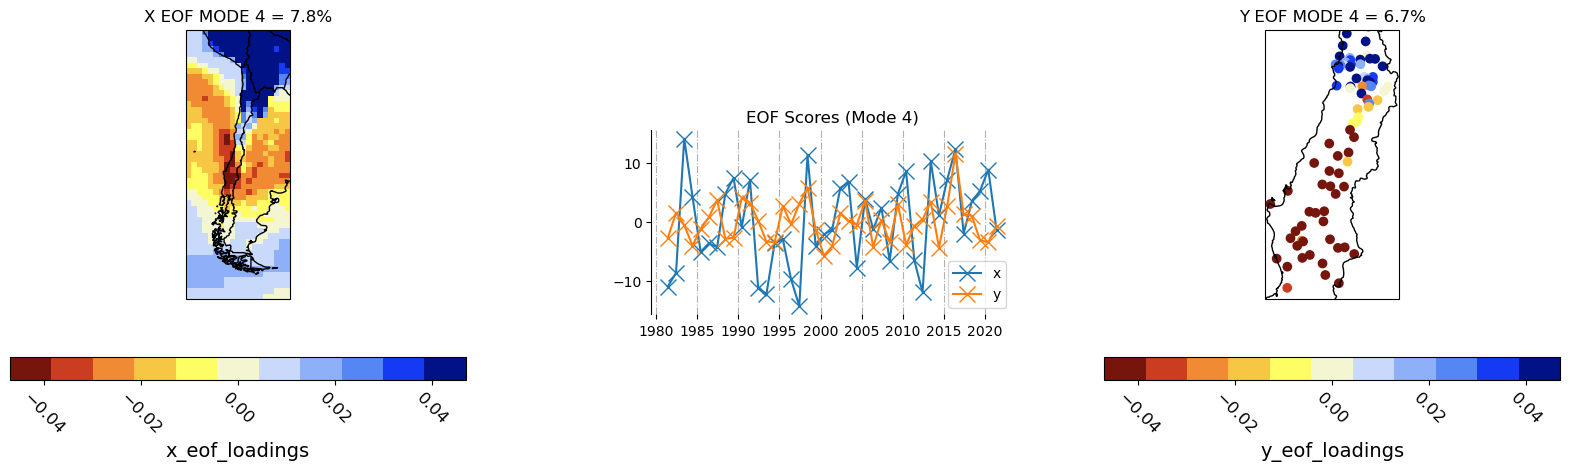

GEOSS2S.TMIN: EOF 5
GEOSS2S.TMIN: EOF 5


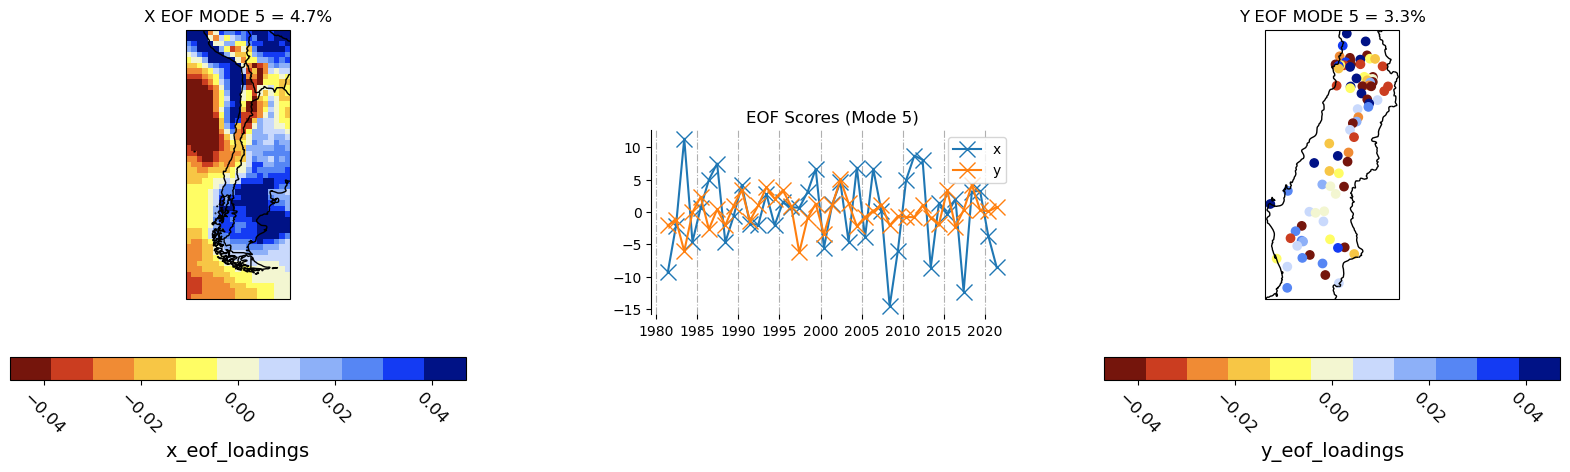

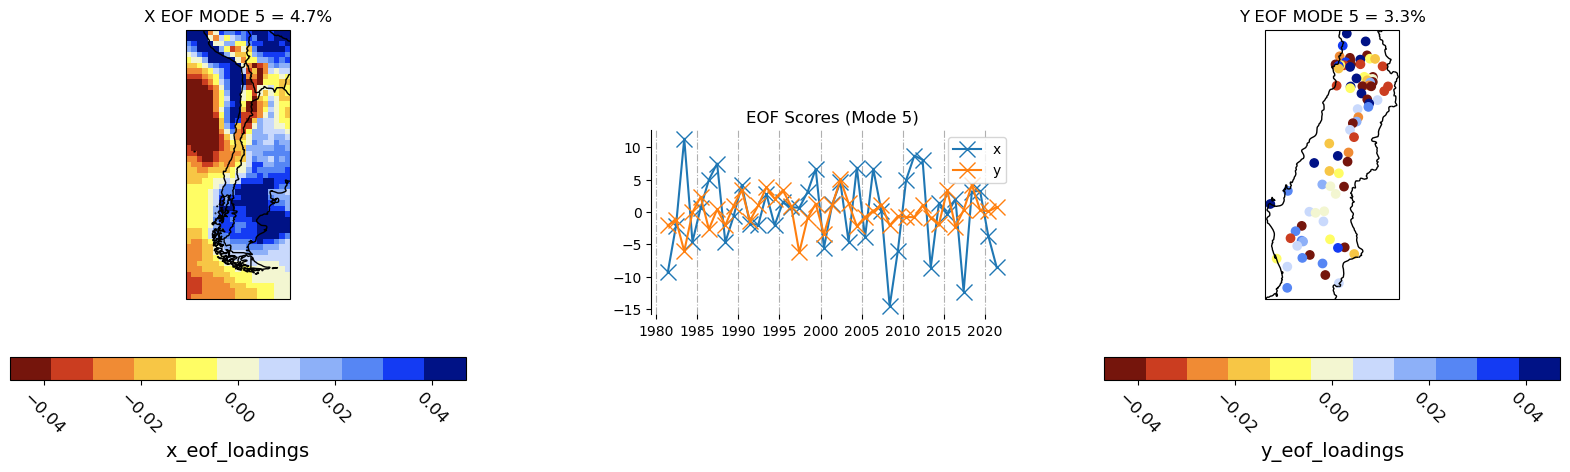

In [14]:
pycpt.plot_eof_modes(MOS, predictor_names, pxs, pys, domain_dir, domain=download_args['predictand_extent'], color_bar=color_bar)

#### Plot CCA Modes

GEOSS2S.TMIN: CCA MODE 1 - Canonical Correlation = 0.58
GEOSS2S.TMIN: CCA MODE 1 - Canonical Correlation = 0.58


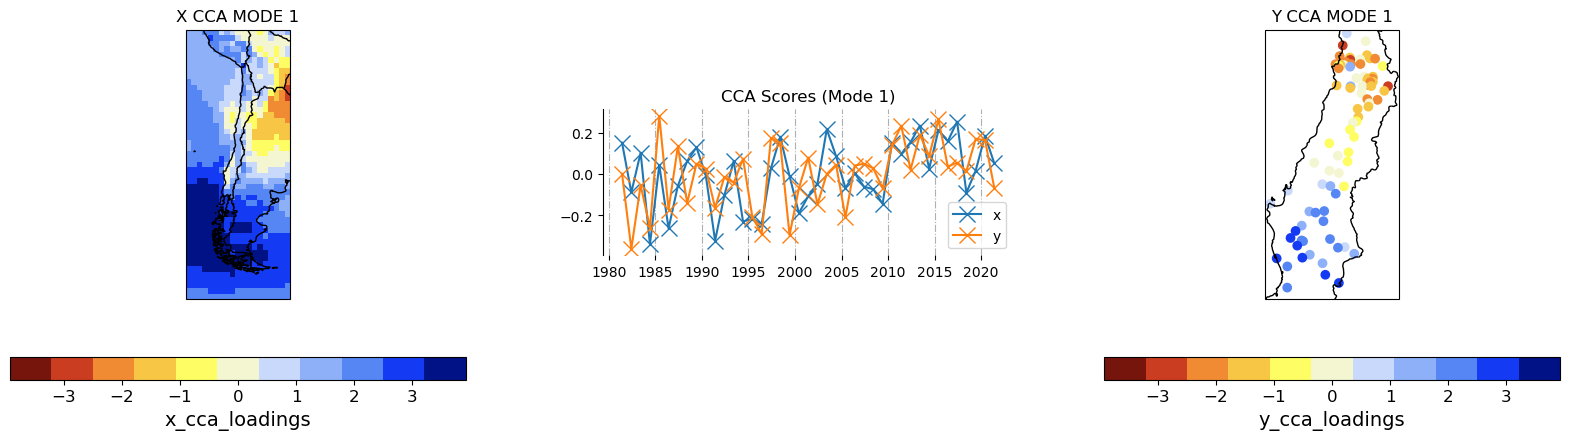

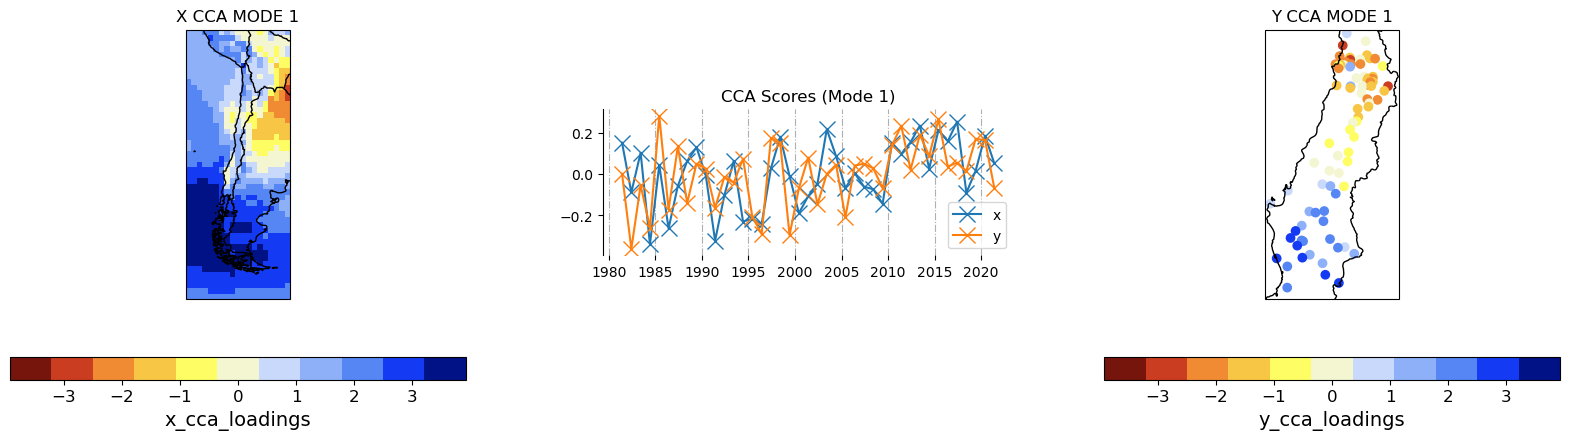

GEOSS2S.TMIN: CCA MODE 2 - Canonical Correlation = 0.35
GEOSS2S.TMIN: CCA MODE 2 - Canonical Correlation = 0.35


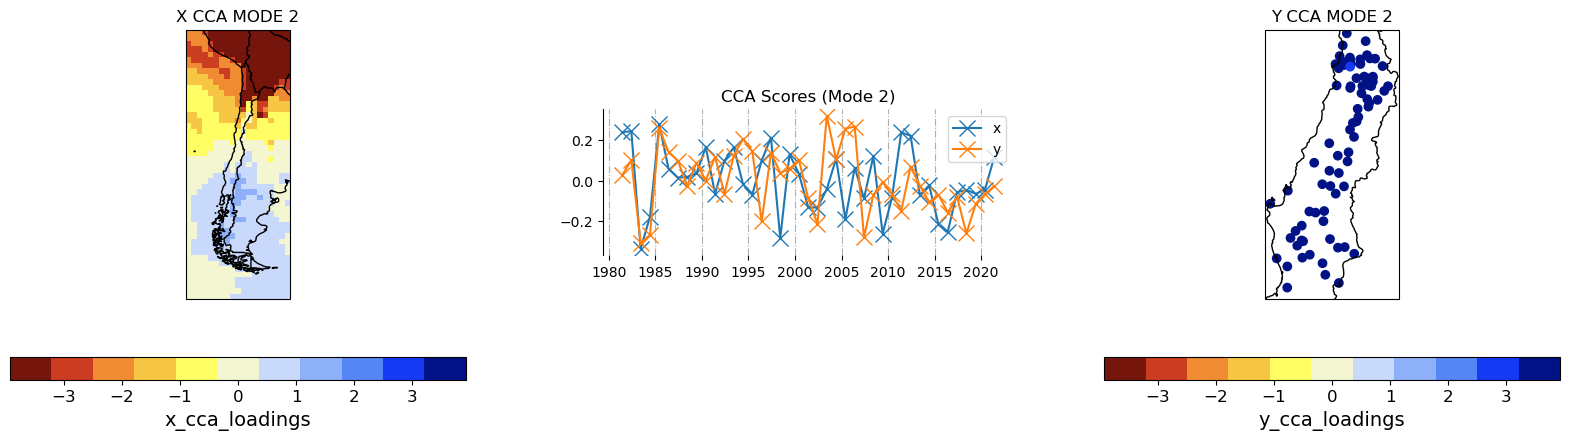

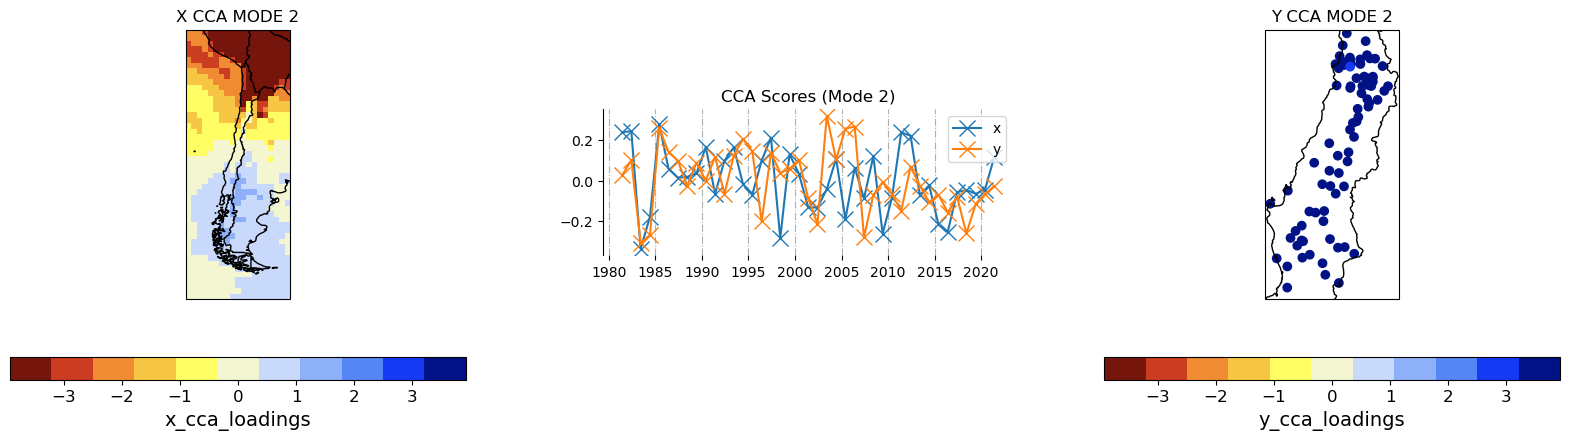

GEOSS2S.TMIN: CCA MODE 3 - Canonical Correlation = 0.17
GEOSS2S.TMIN: CCA MODE 3 - Canonical Correlation = 0.17


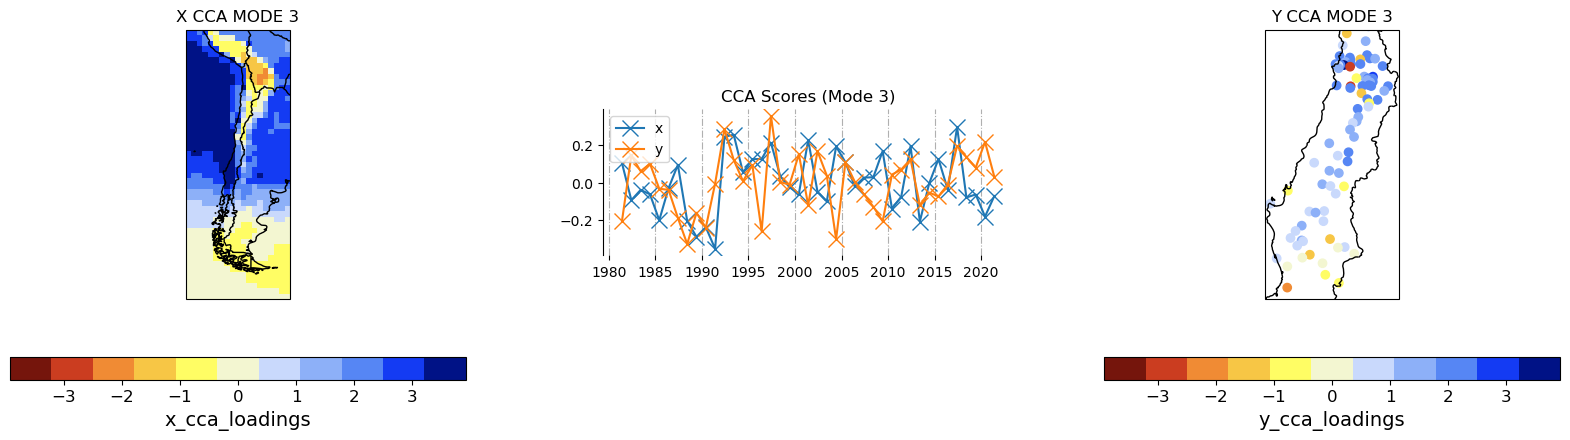

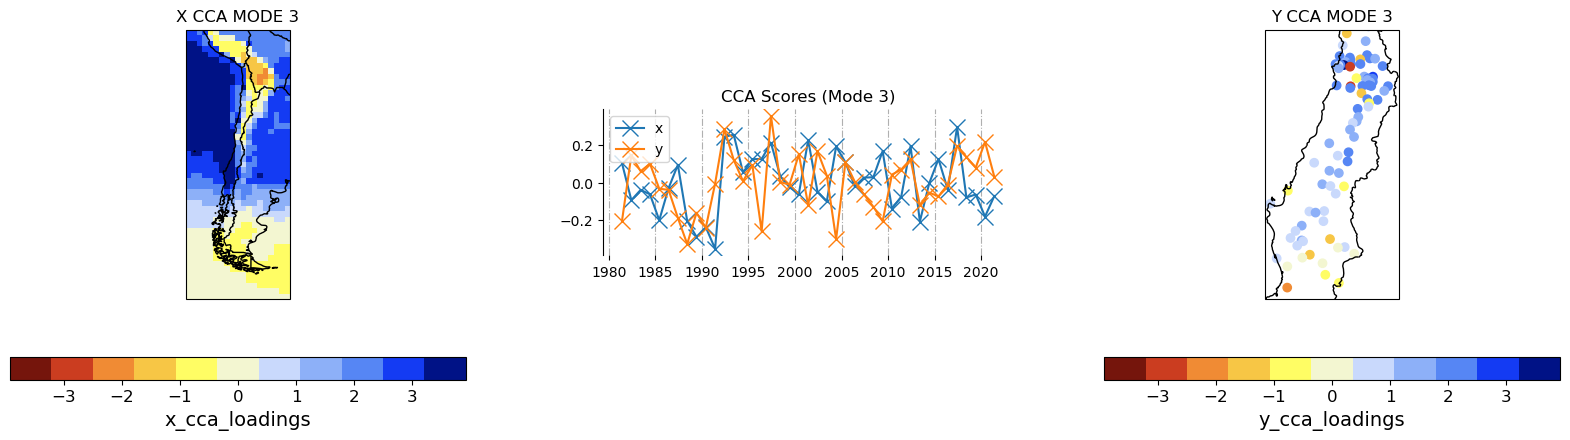

In [15]:
pycpt.plot_cca_modes(MOS, predictor_names, pxs, pys, domain_dir, domain=download_args['predictand_extent'], color_bar=color_bar)

#### Plot Forecasts

In [16]:
#If you wish to change the color bar extremes of the deterministic forecast, adjust the values below; Otherwise, use 'None' .
vmin=None
vmax=None

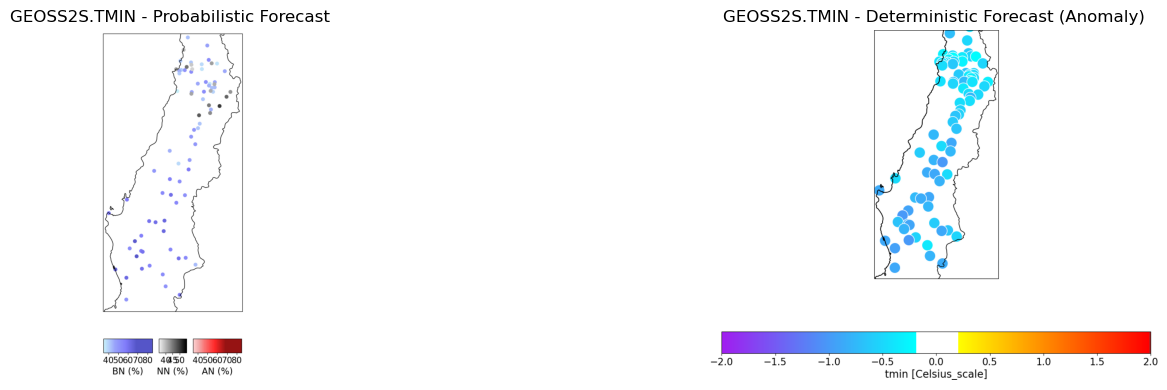

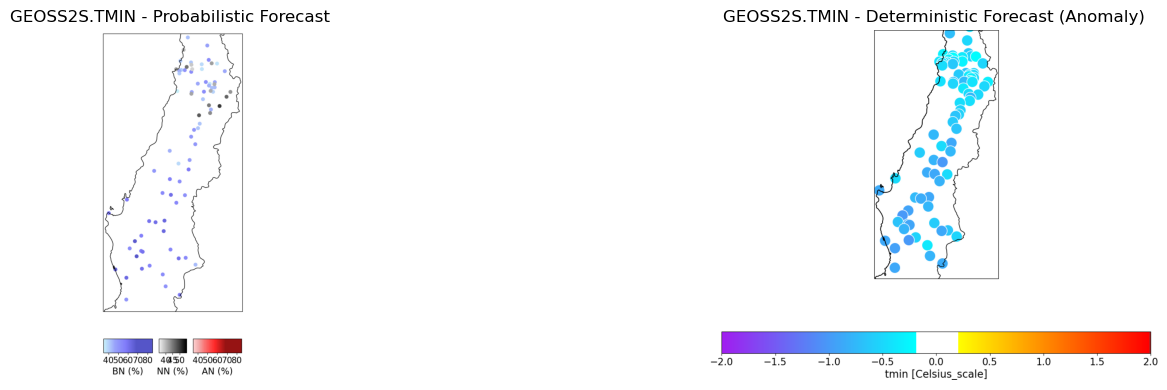

<Figure size 700x900 with 0 Axes>

<Figure size 700x900 with 0 Axes>

In [17]:
pycpt.plot_forecasts(cpt_args, predictand_name, fcsts, domain_dir, predictor_names, MOS, domain=download_args['predictand_extent'],vmin=vmin,vmax=vmax)

# Multi-Model Ensemble

Choose which models to include in the MME, e.g.
```
ensemble = ['CFSv2.PRCP','SEAS5.PRCP']
```

In [18]:
ensemble = predictor_names

In [19]:
det_fcst, pr_fcst, pev_fcst, mme_skill = pycpt.construct_mme(fcsts, hcsts, Y, ensemble, predictor_names, cpt_args, domain_dir)

#### Plot MME Forecast Skill

Deterministic metrics: pearson, spearman, 2afc, roc_below, roc_above

Probabilistic metrics: generalized_roc, rank_probability_skill_score 

e.g.
```
skill_metrics = ["spearman", "generalized_roc"]
```

In [20]:
mme_skill_metrics = [
    "spearman",
    "2afc",
    "generalized_roc",
    "rank_probability_skill_score",
]

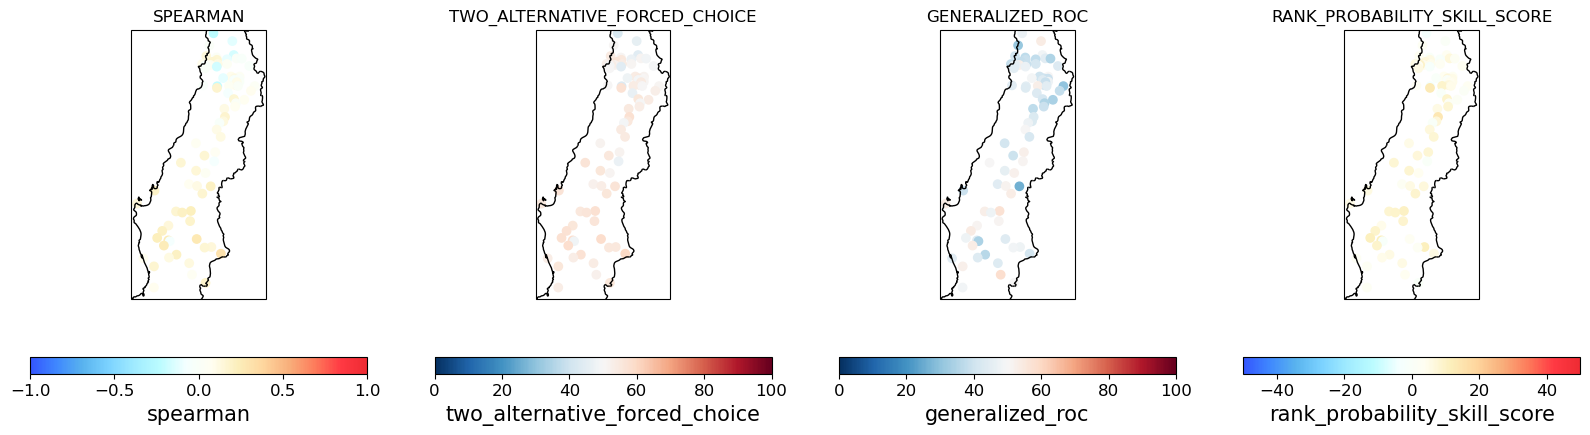

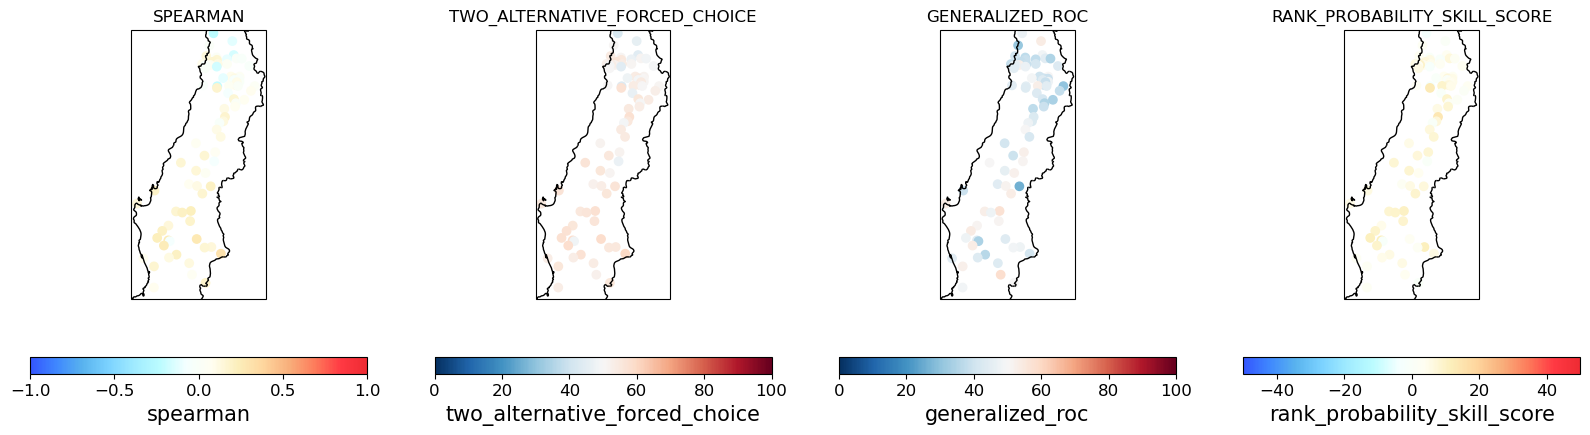

In [21]:
pycpt.plot_mme_skill(predictor_names, mme_skill, MOS, domain_dir, mme_skill_metrics, domain=download_args['predictand_extent'])

#### Plot MME Forecasts

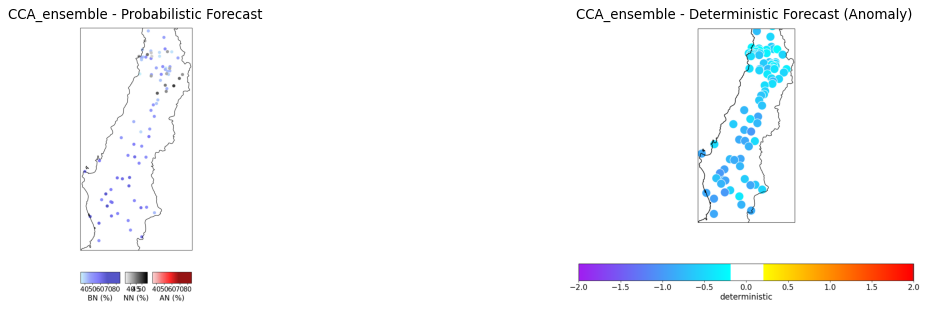

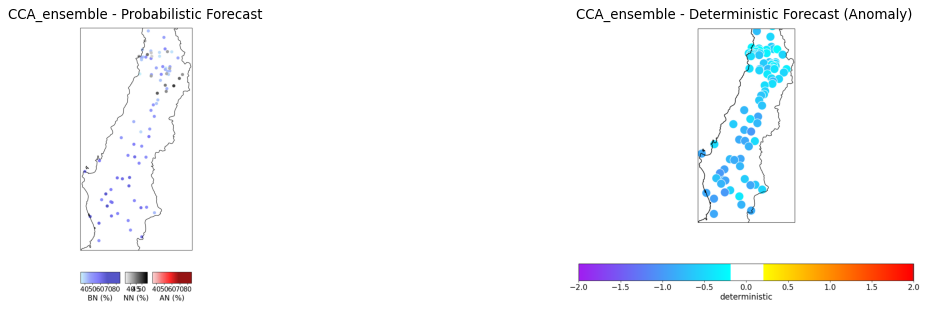

<Figure size 700x900 with 0 Axes>

<Figure size 700x900 with 0 Axes>

In [22]:
pycpt.plot_mme_forecasts(cpt_args, predictand_name, pr_fcst, MOS, domain_dir, det_fcst, domain=download_args['predictand_extent'],vmin=vmin,vmax=vmax)

#### Construct MME Flexible Forecasts (full PDF)

If `isPercentile` is `True`, the threshold is a percentile (e.g., 0.5)
else in the unit of the predictand (e.g., mm, degC, ...)

In [23]:
threshold = 0.5
isPercentile = True

In [24]:
exceedance_prob, fcst_scale, climo_scale, fcst_mu, climo_mu, Y2, ntrain, transformed_threshold = pycpt.construct_flex_fcst(MOS, cpt_args, det_fcst, threshold, isPercentile, Y, pev_fcst)

#### Plot Flexible MME Forecasts

Choose a gridpoint within the predictand domain to plot the forecast and climatological probability of exceedance and PDF curves. If set to None, the centroid of the predictand domain will be used.

If you want to use a different color bar than the one used by default, assign the name of the desired color bar to the variable **color_bar**, None value will use the default color bars. If you are unaware of the available color bars, run `get_colors_bars()`.

In [25]:
for name, station in zip(Y['Name'].values, Y['station'].values):
    print(name, station)

Visviri_Tenencia 1700001
Caquena 1001005
Putre 180017
Parinacota Ex Endesa 1020017
Chungara Ajata 1010010
Chacalluta 180005
Azapa 1310019
Chilcaya 1030003
Codpa 1410012
Lagunillas (Pampa Lirima) 1730016
Cerro Colorado 1740002
Iquique 200006
Guatacondo 200004
Parshall N 2 2103018
Conchi Embalse 2104008
Linzor 2105016
Ayquina 2105018
Caspana 220022
Chiu-Chiu 2104010
El Tatio 2105022
Calama 220002
Sierra Gorda 2700001
San Pedro de Atacama INIA 220024
Toconao 230004
Antofagasta U del norte 230002
Peine 2500020
Aguas Verdes 2942001
Potrerillos 260004
Chañaral (falda verde) 260002
Desierto de Atacama, Caldera Ad. 270008
Copiapo U Atacama 270009
Copiapo_DGA 3450004
Los Loros 3430007
Lautaro Embalse 3430006
Canto De Agua 3701001
Iglesia Colorada 3414002
Vallenar 3823003
Santa Juana 3820004
El Transito 3806002
San Felix 3815004
Conay en Albaricoque 3802006
El Trapiche 4120001
La Serena 290004
Juntas 4302014
Rivadavia 4308003
Vicuña 10601
La Ortiga 4311005
La Laguna Embalse 4301005
Hurtado 45020

In [26]:
# Note that station ID is always a string, even if it happens to represent a number.
location_selector = {'station': '530005'}
color_bar = None

In [27]:
pycpt.plot_mme_flex_forecast_station(predictand_name, exceedance_prob, location_selector, transformed_threshold, fcst_scale, climo_scale, fcst_mu, climo_mu, Y2, cpt_args['transform_predictand'], ntrain, Y, MOS, domain_dir,color_bar, domain=download_args['predictand_extent'])

KeyError: 'X'

KeyError: 'X'

These final cells record information about the python environment that will be useful if we need to reproduce this configuration in the future.

In [ ]:
!conda list

In [ ]:
!conda list --explicit